In [1]:
import strax
import straxen
print(straxen.__file__)
print(straxen.__version__)
print(strax.__version__)
import pandas as pd
pd.options.display.max_colwidth = 100
from tqdm import tqdm
import numpy as np

import numba

from scipy.optimize import curve_fit
from scipy import stats

import matplotlib.pyplot as plt

/home/gvolta/XENONnT/straxen/straxen/__init__.py
0.5.0
0.8.8


In [2]:
strax.Mailbox.DEFAULT_MAX_MESSAGES = 2

In [3]:
st = straxen.contexts.strax_SPE()

In [4]:
st.show_config()

,option,default,current,applies_to,help
0,storage_converter,False,False,Context,"If True, save data that is loaded from one frontend through all willing other storage frontends."
1,fuzzy_for,(),(),Context,"Tuple of plugin names for which no checks for version, providing plugin, and config will be perf..."
2,fuzzy_for_options,(),(),Context,Tuple of config options for which no checks will be performed when looking for data.
3,allow_incomplete,False,False,Context,"Allow loading of incompletely written data, if the storage systems support it"
4,allow_rechunk,True,True,Context,Allow rechunking of data during writing.
5,allow_multiprocess,False,True,Context,"Allow multiprocessing.If False, will use multithreading only."
6,allow_shm,False,False,Context,Allow use of /dev/shm for interprocess communication.
7,forbid_creation_of,(),"(raw_records,)",Context,"If any of the following datatypes is requested to be created, throw an error instead. Useful to ..."
8,store_run_fields,(),"(name, number, reader.ini.name, tags.name, start, end, livetime, trigger.events_built)",Context,Tuple of run document fields to store during scan_run.
9,check_available,(),"(raw_records, event_info)",Context,Tuple of data types to scan availability for during scan_run.


In [5]:
st.show_config('led_calibration')

,option,default,current,applies_to,help
0,led_window,"(150, 275)",<OMITTED>,"(led_calibration,)",Window (samples) where we expect the signal in LED calibration
1,noise_window,"(0, 125)",<OMITTED>,"(led_calibration,)",Window (samples) to analysis the noise
2,channel_list,"(0, 248)",<OMITTED>,"(led_calibration,)","Three different light level for XENON1T: (0,36), (37,126), (127,248). Defalt value: all the PMTs"
3,pax_raw_dir,/data/xenon/raw,<OMITTED>,"(raw_records,)",Directory with raw pax datasets
4,stop_after_zips,0,<OMITTED>,"(raw_records,)",Convert only this many zip files. 0 = all.
5,events_per_chunk,50,<OMITTED>,"(raw_records,)",Number of events to yield per chunk
6,samples_per_record,110,<OMITTED>,"(raw_records,)",Number of samples per record


In [6]:
st = st.new_context(config=dict(channel_list=(1,2)))
st.show_config('led_calibration')

,option,default,current,applies_to,help
0,led_window,"(150, 275)",<OMITTED>,"(led_calibration,)",Window (samples) where we expect the signal in LED calibration
1,noise_window,"(0, 125)",<OMITTED>,"(led_calibration,)",Window (samples) to analysis the noise
2,channel_list,"(0, 248)","(1, 2)","(led_calibration,)","Three different light level for XENON1T: (0,36), (37,126), (127,248). Defalt value: all the PMTs"
3,pax_raw_dir,/data/xenon/raw,<OMITTED>,"(raw_records,)",Directory with raw pax datasets
4,stop_after_zips,0,<OMITTED>,"(raw_records,)",Convert only this many zip files. 0 = all.
5,events_per_chunk,50,<OMITTED>,"(raw_records,)",Number of events to yield per chunk
6,samples_per_record,110,<OMITTED>,"(raw_records,)",Number of samples per record


In [8]:
runs = st.select_runs(run_mode='LED*')

Checking data availability: 100%|██████████| 2/2 [00:25<00:00, 12.90s/it]


In [9]:
runs

,name,number,start,reader.ini.name,trigger.events_built,end,tags,mode,livetime,raw_records_available,event_info_available
121,180219_0952,16979,2018-02-19 09:52:13+00:00,LED_3mus_stable,196157.0,2018-02-19 10:00:16+00:00,"gain_step0,_sciencerun2_candidate",LED_3mus_stable,00:08:03,True,False
122,180219_1001,16980,2018-02-19 10:01:41+00:00,LED_3mus_stable,196207.0,2018-02-19 10:09:44+00:00,"gain_step1,_sciencerun2_candidate",LED_3mus_stable,00:08:03,True,False
123,180219_1011,16981,2018-02-19 10:11:06+00:00,LED_3mus_stable,194686.0,2018-02-19 10:19:09+00:00,"gain_step2,_sciencerun2_candidate",LED_3mus_stable,00:08:03,True,False
124,180219_1021,16982,2018-02-19 10:21:18+00:00,LED_3mus_stable,196373.0,2018-02-19 10:29:22+00:00,"gain_step3,_sciencerun2_candidate",LED_3mus_stable,00:08:04,True,False
125,180219_1030,16983,2018-02-19 10:31:02+00:00,LED_3mus_stable,195938.0,2018-02-19 10:39:05+00:00,"gain_step4,_sciencerun2_candidate",LED_3mus_stable,00:08:03,True,False
126,180219_1049,16985,2018-02-19 10:50:00+00:00,LED_3mus_stable,194366.0,2018-02-19 10:58:02+00:00,"spe_topbulk,_sciencerun2_candidate",LED_3mus_stable,00:08:02,True,False
127,180219_1059,16986,2018-02-19 10:59:21+00:00,LED_3mus_stable,193050.0,2018-02-19 11:07:24+00:00,"spe_topring,_sciencerun2_candidate",LED_3mus_stable,00:08:03,True,False
128,180219_1110,16987,2018-02-19 11:10:28+00:00,LED_7mus_stable,46116.0,2018-02-19 11:15:31+00:00,"Afterpulse,_sciencerun2_candidate",LED_7mus_stable,00:05:03,True,False
129,180219_1116,16988,2018-02-19 11:16:48+00:00,LED_7mus_stable,137431.0,2018-02-19 11:31:50+00:00,"Afterpulse,_sciencerun2_candidate",LED_7mus_stable,00:15:02,True,False


#### Hist of windows integration by raw_records plugin

In [17]:
run_id = '180219_1011'
data_rr = st.get_array(run_id, 'raw_records', max_workers = 10, seconds_range=(0,10))

#### Shingo baseline

In [27]:
def get_area(raw_records, led_window, noise_window):
    '''
    Needed for the gain computation.
    Sum the data in the defined window to get the area.
    This is done in 6 integration window and it returns the average area.
    '''
    left = led_window[0]
    end_pos = [led_window[1]+2*i for i in range(6)]

    left_noise  = noise_window[0]
    right_noise = noise_window[-1]
    
    Area = np.zeros((len(raw_records)), dtype=[('channel','int16'),('area','float64')])
    for right in end_pos:
        Area['area'] += raw_records['data'][:, left:right].sum(axis=1)
        Area['area'] -= float(right-left)*raw_records['data'][:, left_noise:right_noise].sum(axis=1)/(right_noise-left_noise)
    Area['channel'] = raw_records['channel']
    Area['area'] = Area['area']/float(len(end_pos))
        
    return Area


def get_area_old(raw_records, led_window, noise_window):
    '''
    Needed for the gain computation.
    Sum the data in the defined window to get the area.
    This is done in 6 integration window and it returns the average area.
    '''
    left = led_window[0]
    end_pos = [led_window[1]+2*i for i in range(6)]

    left_noise  = noise_window[0]
    right_noise = noise_window[-1]
    
    Area = np.zeros((len(raw_records)), dtype=[('channel','int16'),('area','float64')])
    for right in end_pos:
        Area['area'] += raw_records['data'][:, left:right].sum(axis=1)
        #Area['area'] -= float(right-left)*raw_records['data'][:, left_noise:right_noise].sum(axis=1)/(right_noise-left_noise)
    Area['channel'] = raw_records['channel']
    Area['area'] = Area['area']/float(len(end_pos))
        
    return Area


In [35]:
(Area['area'] - Area_shingo['area']).mean()

-62.48332268370607

In [33]:
Area_shingo['area']

array([ 18.8       ,  62.98666667, 654.40666667, ..., 167.58      ,
       274.41333333,  58.48666667])

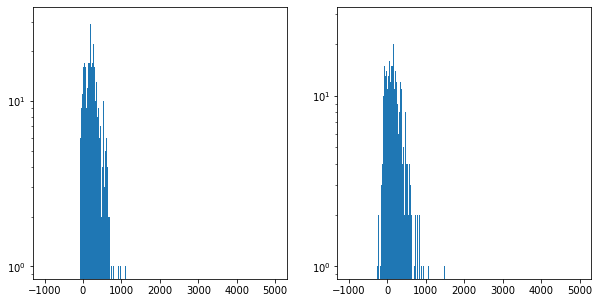

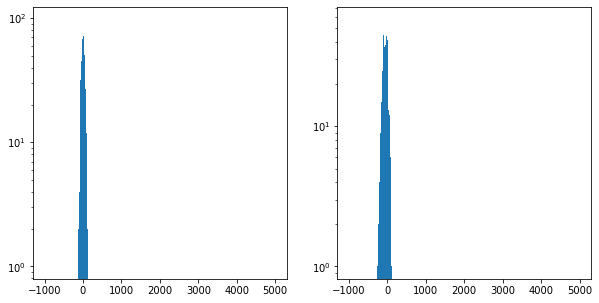

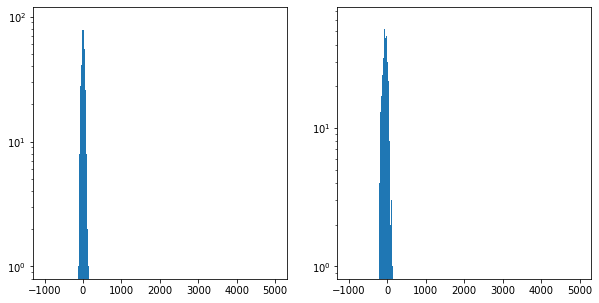

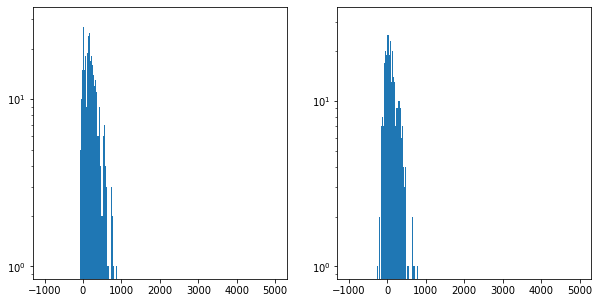

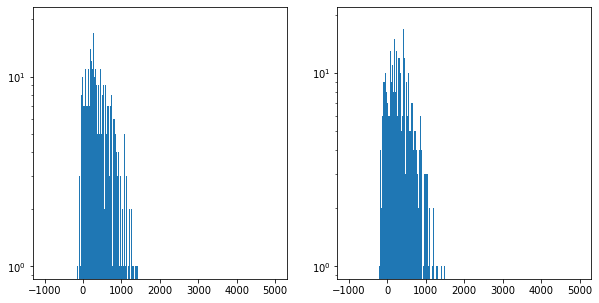

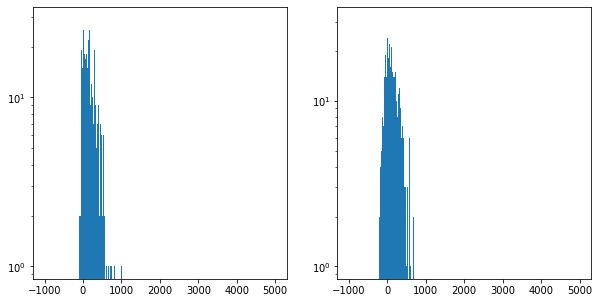

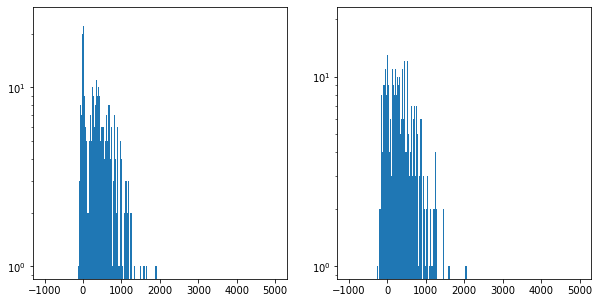

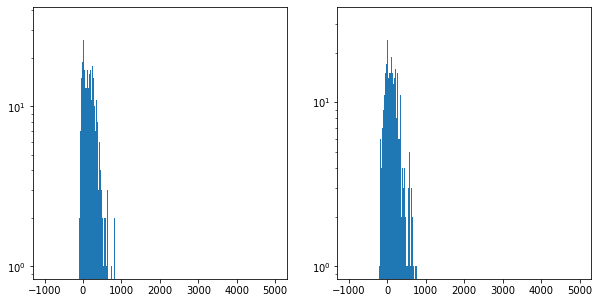

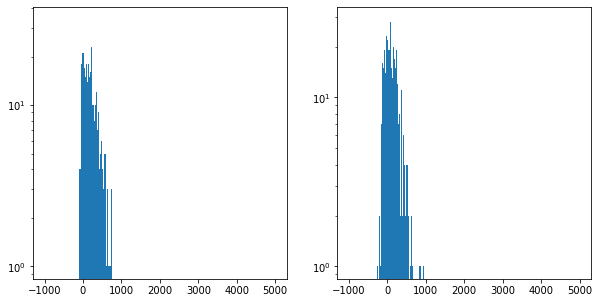

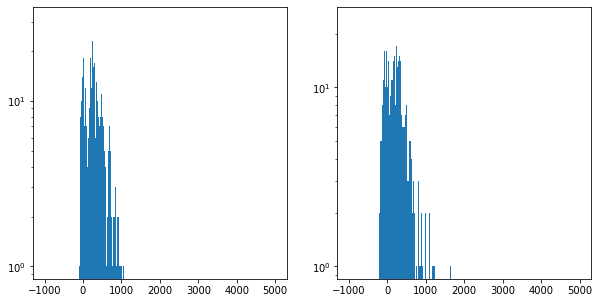

In [28]:
for ch in range(0, 10):
    Area_shingo = get_area(data_rr[data_rr['channel']==ch], (150, 275), (0,125))
    Area = get_area_old(data_rr[data_rr['channel']==ch], (150, 275), (0,125))
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.hist(Area_shingo['area'], bins=3000, range=[-1000,5000])
    plt.yscale('log')
    plt.subplot(122)
    plt.hist(Area['area'], bins=3000, range=[-1000,5000])
    plt.yscale('log')
    plt.show()

#### Hist of windows integration by led_calibration plugin

In [8]:
import configparser as cp
Config = cp.ConfigParser()
Config.read('/home/gvolta/XENONnT/LedAnalysis/Script/configuration.ini')
run_led = Config.get('runs_pars','run_led')
led_window   = [Config.getint('window_pars','led_windows_left'), Config.getint('window_pars','led_windows_right')]
noise_window = [Config.getint('window_pars','noise_windows_left'), Config.getint('window_pars','noise_windows_right')]

In [9]:
st_2 = st.new_context(config=dict(led_window=(led_window[0],led_window[1]), 
                                noise_window=(noise_window[0], noise_window[1]),
                                channel_list=(2,3)))
st_2.show_config('led_calibration')

,option,default,current,applies_to,help
0,led_window,"(150, 275)","(143, 168)","(led_calibration,)",Window (samples) where we expect the signal in LED calibration
1,noise_window,"(0, 125)","(5, 30)","(led_calibration,)",Window (samples) to analysis the noise
2,channel_list,"(0, 248)","(2, 3)","(led_calibration,)","Three different light level for XENON1T: (0,36), (37,126), (127,248). Defalt value: all the PMTs"
3,pax_raw_dir,/data/xenon/raw,<OMITTED>,"(raw_records,)",Directory with raw pax datasets
4,stop_after_zips,0,<OMITTED>,"(raw_records,)",Convert only this many zip files. 0 = all.
5,events_per_chunk,50,<OMITTED>,"(raw_records,)",Number of events to yield per chunk
6,samples_per_record,110,<OMITTED>,"(raw_records,)",Number of samples per record


In [10]:
data_lc = st_2.get_array('180219_1049', 'led_calibration', max_workers = 10)

In [11]:
data_lc['channel']

array([2, 3, 2, ..., 3, 2, 3], dtype=int16)

In [ ]:
def get_amplitude(raw_records, led_window=[125, 250], noise_window=[350, 475]):
    '''
    Needed for the SPE computation.
    Take the maximum in two different regions, where there is the signal and where there is not.
    '''
    on = np.zeros((len(raw_records)), dtype=[('channel','int16'),('amplitude_led', '<i4')])
    off = np.zeros((len(raw_records)), dtype=[('channel','int16'),('amplitude_noise', '<i4')])
    i = 0
    for r in raw_records:
        on['amplitude_led'][i] = np.max(r['data'][led_window[0]:led_window[1]])
        on['channel'][i] = r['channel']
        off['amplitude_noise'][i] = np.max(r['data'][noise_window[0]:noise_window[1]])
        off['channel'][i] = r['channel']
        i=i+1
    return on, off

def get_area(raw_records, LED_window=[125, 250]):
    '''
    Needed for the gain computation.
    Sum the data in the defined window to get the area.
    This is done in 6 integration window and it returns the average area.
    '''
    left = LED_window[0]
    end_pos = [LED_window[1]+2*i for i in range(6)]

    Area = np.zeros((len(raw_records)), dtype=[('channel','int16'),('area','float32')])
    for right in end_pos:
        Area['area'] += raw_records['data'][:, left:right].sum(axis=1)
    Area['channel'] = raw_records['channel']
    Area['area'] = Area['area']/float(len(end_pos))
        
    return Area

In [ ]:
on, off = get_amplitude(data_rr)
Area = get_area(data_rr)

In [ ]:
data_lc

### Comparison

In [ ]:
plt.figure(figsize=(20,22))

plt.subplot(321)
plt.hist(data_lc[data_lc['channel']==0]['area'], bins=200, range=(-500, 2000), 
         color='red', histtype='step', density=True, label='lc')
plt.yscale('log')
plt.xlabel('Area')
#plt.title('led_calibration')

plt.subplot(322)
plt.hist(Area[Area['channel']==0]['area'], bins=200, range=(-500, 2000), 
         color='gold', histtype='step', density=True, label='rr')
plt.yscale('log')
plt.xlabel('Area')
#plt.title('raw_records')

plt.subplot(323)
plt.hist(data_lc[data_lc['channel']==0]['amplitude_led'], bins=100, range=(-5, 200), 
         color='red', histtype='step', density=True, label='lc')
plt.hist(data_lc[data_lc['channel']==0]['amplitude_noise'], bins=100, range=(-5, 200), 
         color='black', histtype='step', density=True, label='lc')
plt.yscale('log')
plt.xlabel('Amplitude')

plt.subplot(324)
plt.hist(on[on['channel']==0]['amplitude_led'], bins=100, range=(-5, 200), 
         color='gold', histtype='step', density=True, label='rr')
plt.hist(off[off['channel']==0]['amplitude_noise'], bins=100, range=(-5, 200), 
         color='black', histtype='step', density=True, label='rr')
plt.yscale('log')
#plt.xlabel('Amplitude')

plt.subplot(325)
plt.hist(data_lc[data_lc['channel']==0]['area'], bins=200, range=(-500, 2000), 
         color='red', histtype='step', density=True, label='lc')
plt.hist(Area[Area['channel']==0]['area'], bins=200, range=(-500, 2000), 
         color='gold', histtype='step', density=True, label='rr')
plt.yscale('log')
plt.xlabel('Area')
plt.legend(loc='best')
#plt.title('raw_records')

plt.subplot(326)
plt.hist(on[on['channel']==0]['amplitude_led'], bins=100, range=(-5, 200), 
         color='gold', histtype='step', density=True, label='lc')
plt.hist(data_lc[data_lc['channel']==0]['amplitude_led'], bins=100, range=(-5, 200), 
         color='red', histtype='step', density=True, label='rr')
plt.yscale('log')
plt.xlabel('Amplitude')
plt.legend(loc='best')

plt.show()
plt.tight_layout()